In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.replace("Delhi Daredevils","Delhi Capitals",inplace=True)

In [8]:
team1=["Sunrisers Hyderabad","Delhi Capitals"]
team2=["Delhi Capitals","Sunrisers Hyderabad"]
data=matches[matches["team1"].isin(team1)][matches["team2"].isin(team2)]
data.shape

C:\Users\Rutik Ambre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 18)

In [9]:
delivery=pd.read_csv('deliveries.csv')
delivery.replace("Delhi Daredevils","Delhi Capitals",inplace=True)
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


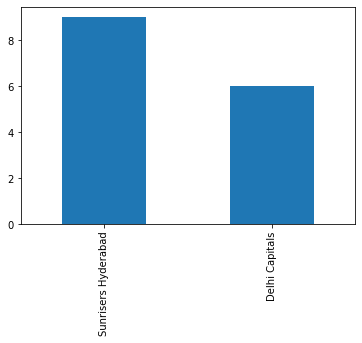

In [10]:
data['winner'].value_counts().plot(kind='bar')

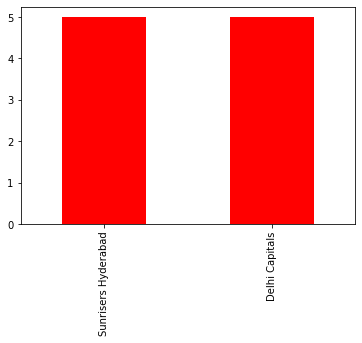

In [11]:
toss=data[data['toss_winner']==data['winner']]
toss['winner'].value_counts().plot(kind='bar',color='red')

A lot depends on the toss decision against SRH if delhi wins the toss it has won matches 5/6 times 
The head to head record says DC has won more in matches if toss and win match plot
So DC will win.

In [24]:
l1=['Rashid Khan']
rashid= delivery[delivery["bowler"].isin(l1)]
rashid
rashid['player_out']=rashid['player_dismissed'].apply(lambda x: 1 if not pd.isnull(x) else 0)
rashid.drop(columns=['player_dismissed','fielder'],inplace=True)
rashid.head()

C:\Users\Rutik Ambre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind,player_out
157,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,1,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,0
158,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,2,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,4,0,4,NaN,0
159,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,3,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,0
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,bowled,1
161,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,5,TM Head,CH Gayle,Rashid Khan,0,0,0,0,0,0,2,0,2,NaN,0


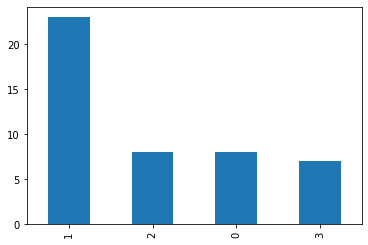

In [34]:
rashid_match = rashid.groupby(by=["match_id"], as_index=False).agg({ 'total_runs': 'sum','player_out':'sum'})
rashid_match['player_out'].value_counts().plot(kind='bar')

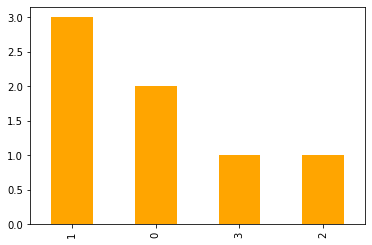

In [35]:
l2=['Delhi Capitals']
rashid_dc= rashid[rashid["batting_team"].isin(l2)]
rashid_dc_match = rashid_dc.groupby(by=["match_id"], as_index=False).agg({ 'total_runs': 'sum','player_out':'sum'})
rashid_dc_match['player_out'].value_counts().plot(kind='bar',color='orange')

Rashid mostly takes 1 wicket in a match
but he has taken 3 wickets thrice in match when it is versus dc Including 2020 as well 
but 3 matches is not conclusive
We take mean number of wickets of rashid vs delhi is close to 1.5 so rounding it off to 2 
Rashid will take 2 wickets.

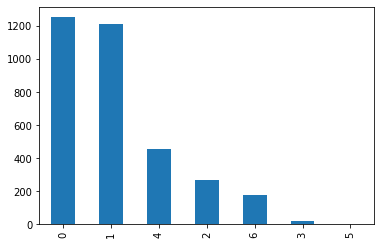

In [61]:
david = delivery[delivery['batsman']=="DA Warner"]
pant = delivery[delivery['batsman']=="RR Pant"]
dhawan = delivery[delivery['batsman']=="S Dhawan"]
pandey = delivery[delivery['batsman']=="MK Pandey"]
iyer = delivery[delivery['batsman']=="SS Iyer"]
kane = delivery[delivery['batsman']=="KS Williamson"]
stoinis = delivery[delivery['batsman']=="MP Stoinis"]
rahane =  delivery[delivery['batsman']=="AM Rahane"]
david['batsman_runs'].value_counts().plot(kind='bar')


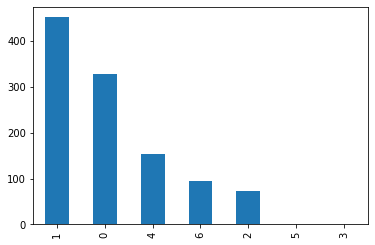

In [41]:
pant['batsman_runs'].value_counts().plot(kind='bar')

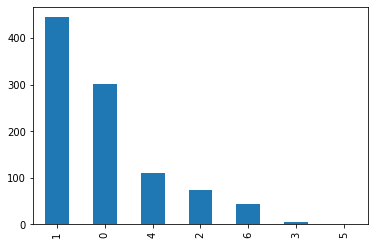

In [42]:
kane['batsman_runs'].value_counts().plot(kind='bar')

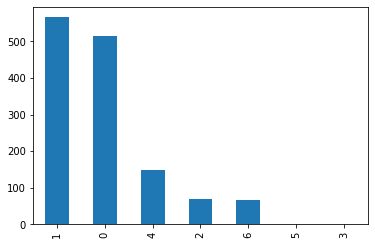

In [43]:
iyer['batsman_runs'].value_counts().plot(kind='bar')

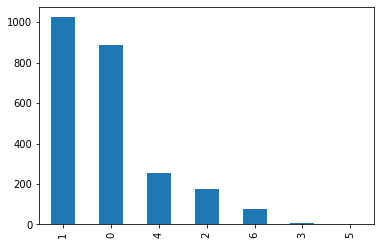

In [44]:
pandey['batsman_runs'].value_counts().plot(kind='bar')

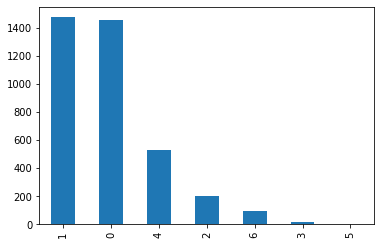

In [45]:
dhawan['batsman_runs'].value_counts().plot(kind='bar')

Finding ratio of fours/matches

In [60]:

print("The fours/matches ratio is",len(david[david['batsman_runs']==4])/len(david['match_id'].unique()))
print("The fours/matches ratio is",len(pant[pant['batsman_runs']==4])/len(pant['match_id'].unique()))
print("The fours/matches ratio is",len(iyer[iyer['batsman_runs']==4])/len(iyer['match_id'].unique()))
print("The fours/matches ratio is",len(dhawan[dhawan['batsman_runs']==4])/len(dhawan['match_id'].unique()))
print("The fours/matches ratio is",len(kane[kane['batsman_runs']==4])/len(kane['match_id'].unique()))
print("The fours/matches ratio is",len(pandey[pandey['batsman_runs']==4])/len(pandey['match_id'].unique()))


The fours/matches ratio is 3.642857142857143
The fours/matches ratio is 2.8518518518518516
The fours/matches ratio is 2.459016393442623
The fours/matches ratio is 3.329113924050633
The fours/matches ratio is 2.707317073170732
The fours/matches ratio is 2.1260504201680672


In [62]:
print("The fours/matches ratio is",len(rahane[rahane['batsman_runs']==4])/len(rahane['match_id'].unique()))
print("The fours/matches ratio is",len(stoinis[stoinis['batsman_runs']==4])/len(stoinis['match_id'].unique()))

The fours/matches ratio is 3.0681818181818183
The fours/matches ratio is 1.36


Warner and dhawan have a good ratio but so does rahane and a lot depends on the amount of the runs scored by the batsman
Rahane, pandey also deals a lot in boundaries so they will score more in boundaries.